## Objectif:
Comprendre au maximum les données pour appliquer une stratégie de modélisation.

### Analyse de la forme :
-   **Identification de la target**: `price`
-   **Nombre de lignes et de colonnes**: 21 613 lignes, 20 colonnes
-   **Types de variables**: Toutes numériques (les variables catégorielles ont été encodées)
-   **Identification des valeurs manquantes**: RAS
### Analyse du fond :
-   **Visualisation de la target**: Variable yant une distribution très asymétrique (prix allant de 75k$ à 7,7M$). Le log des prix a une distribution proche de celle de la loi normale.
-   **Compréhension des différentes variables**: OK (Voir Readme), var ordinales(bedrooms, badrooms, floors, waterfront, view, condition, grade); var continues(sqft_living, sqft_living15, sqft_above, sqft_lot, sqft_lot15, sqft_basement), date(date), var de localisation(zipcode, long, lat), années(yr_built, yr_renovated)
-   **Visualisation des différentes variables**: 
    -   **Variables continues**: Distributions asymétriques à peu près similaires à celles de la target. La distribution du log des variables corrélées avec la target est proche d'une distribution normale.
    -   **Variables ordinales**: Classes déséquilibrées de manière générale
-   **Visualisation des relations entre features-target**
    - **var continues/target**: sqft_living(corr=0.7), sqft_living15(corr=0.59), sqft_above(corr=0.61). Pas de corrélations fortes, les relations sont peut etre non linéaires.
    - **var ordinales/target**: La moyenne des prix varie probablement de manière significative lorque l'on passe d'une classe à une autre pour chaque variable ordinale.
    - **var geographique(zipcode)/target**: La moyenne des prix des maisons varie significativement selon que l'on passe d'un code postal à un autre. 
-   **Visualisation des relations variables-variables**:
    - **Quanti/Quanti**: Correlations entre: sqft_living/sqft_living15(0.76), sqft_living/sqft_above(0.88), sqft_livin15/sqft_above(0.73), sqft_lot/sqft_lot15(0.72)
-   **Identification des outliers**: 

### Tests statistiques:
- **Test d'ANOVA (relations quali/target)**:
    - H0: la variance des prix ne varie pas de manière significative selon qu'on passe d'une categorie à une autre pour chaque variable catégorielle. --> H0 a rejétée pour otutes nos variables ordinales.


In [1]:
# chargement du dataset
import yaml
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Ajout du dossier 'src' au chemin Python
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))

from data_loader import load_data, load_config
config = load_config()

# chargement du dataset
path = config['data']['raw_path']
df = load_data(path)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
plt.style.use('dark_background')
plt.rcParams.update({
    "figure.facecolor":  (0.12 , 0.12, 0.12, 1),
    "axes.facecolor": (0.12 , 0.12, 0.12, 1),
})

In [3]:
# suppression des colonnes non utiles
df.drop(['id'], axis=1, inplace=True)

In [4]:
# Dimensions du dataset
df.shape

(21613, 20)

In [5]:
# type des variables
df.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
# identification des valeurs manquantes
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

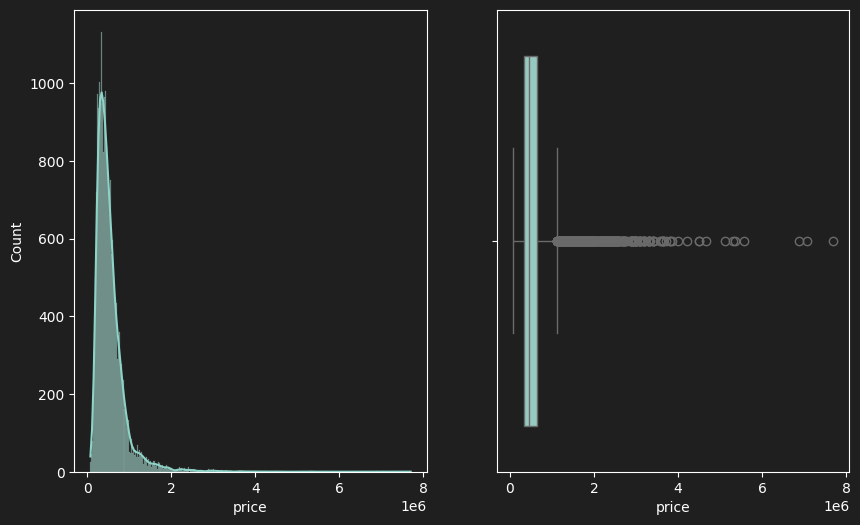

In [22]:
# Visualisation de la target
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x=df['price'])

plt.show()

<Axes: xlabel='price', ylabel='Count'>

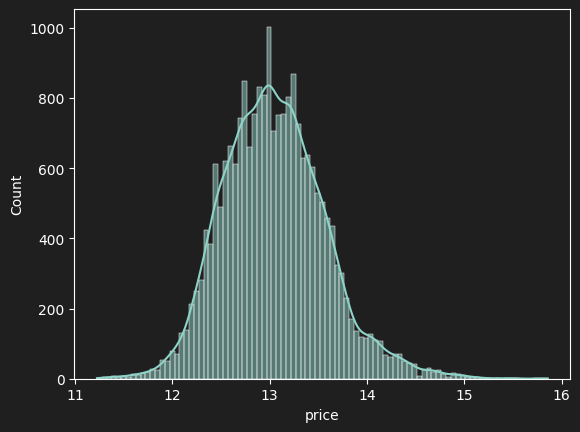

In [8]:
# Distribution du logarithme du prix
price_log = np.log(df['price'])
sns.histplot(price_log, kde=True)

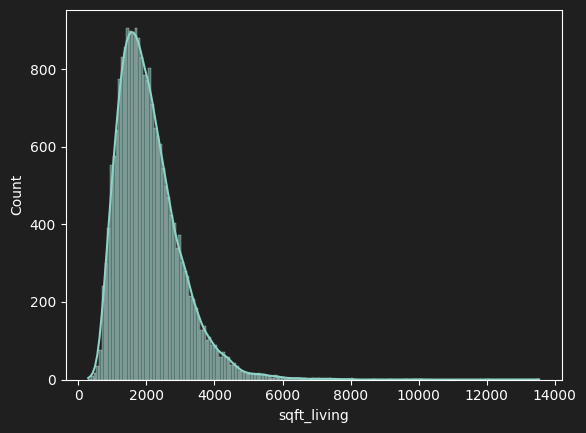

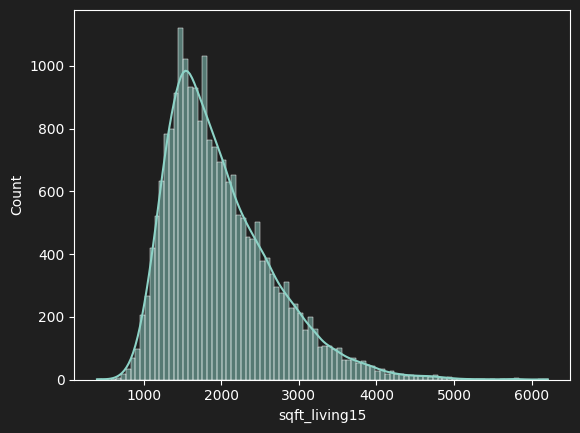

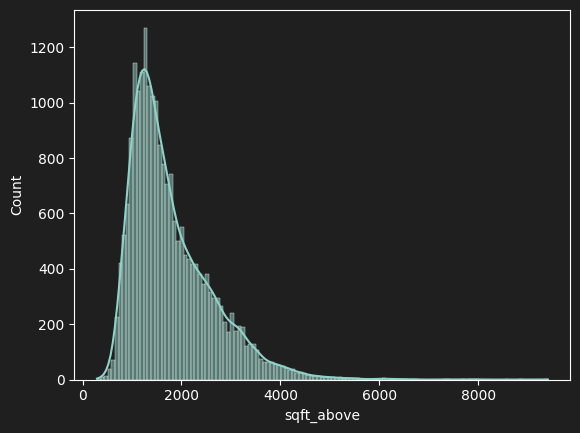

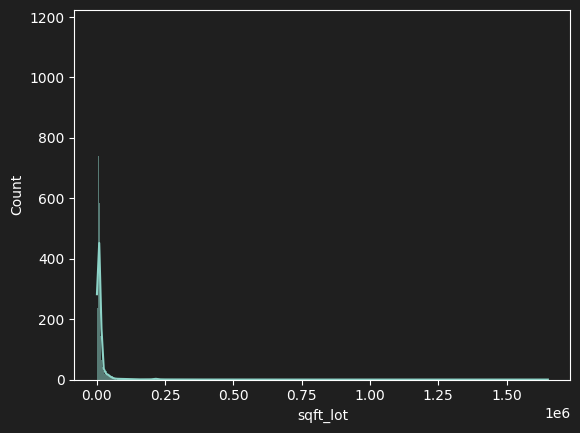

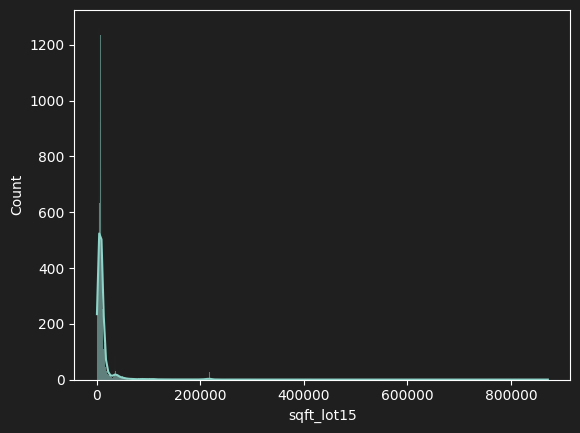

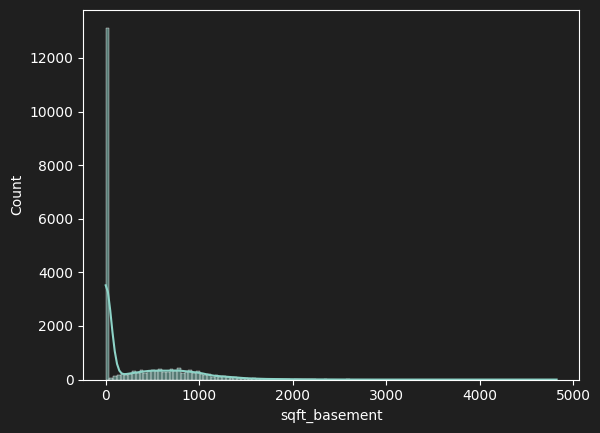

In [9]:
# visualisation des variables continues
columns = ['sqft_living', 'sqft_living15', 'sqft_above', 'sqft_lot', 'sqft_lot15', 'sqft_basement']
for col in columns:
    plt.figure()
    sns.histplot(df[col], kde=True)

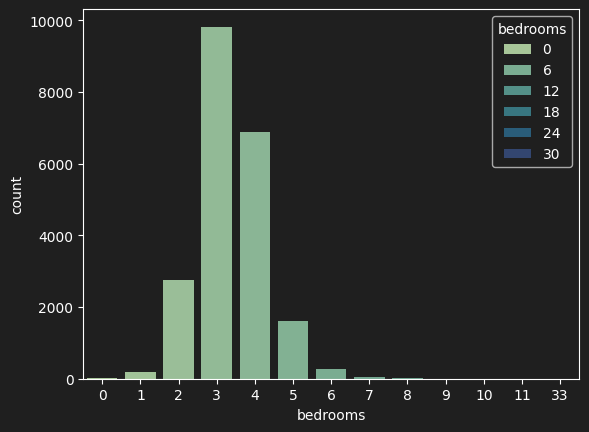

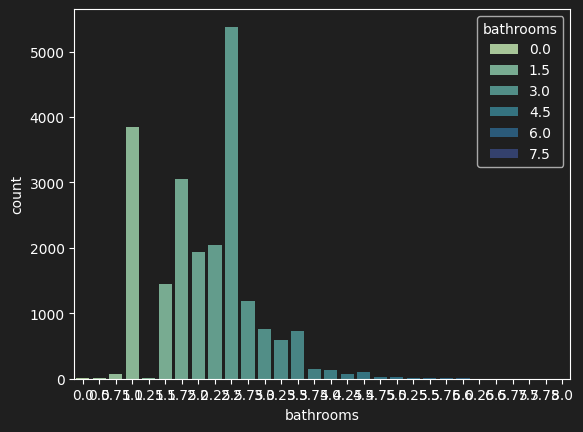

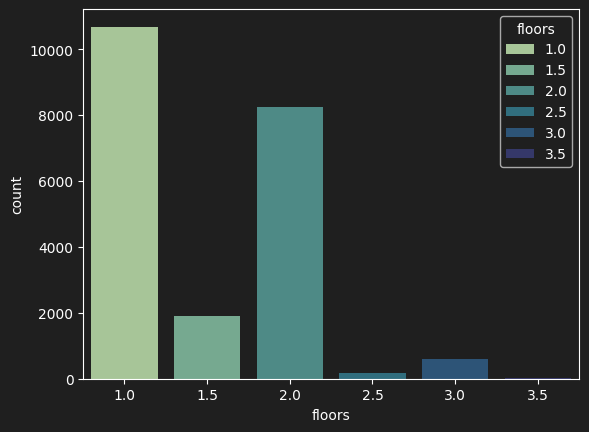

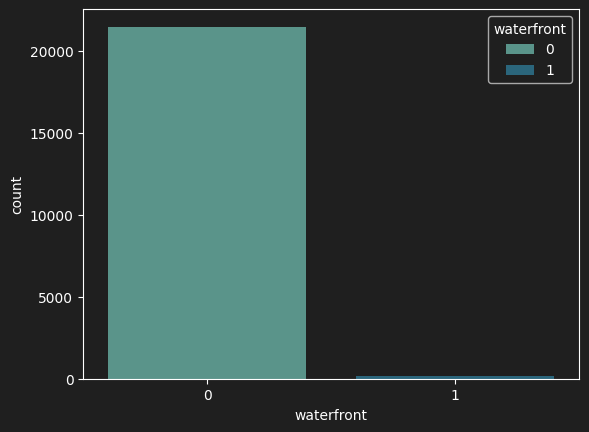

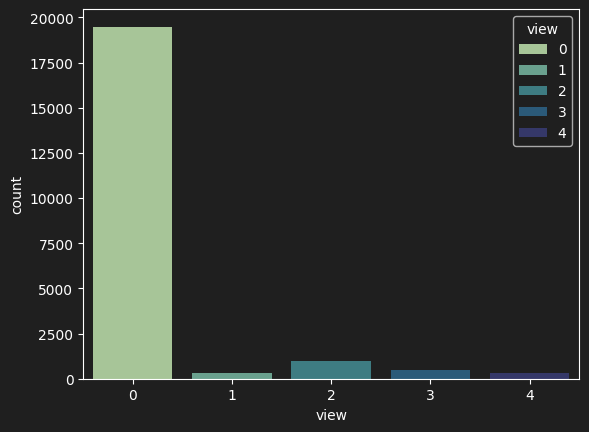

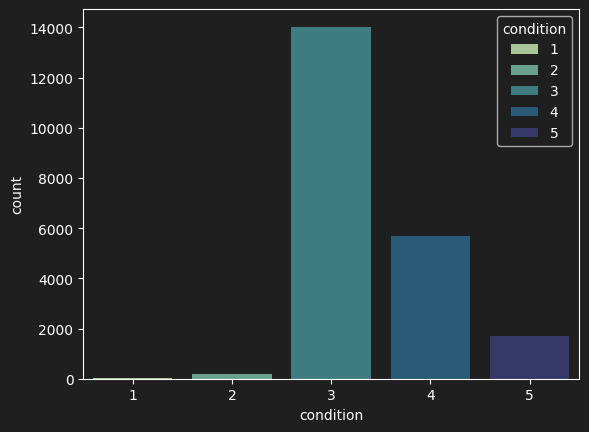

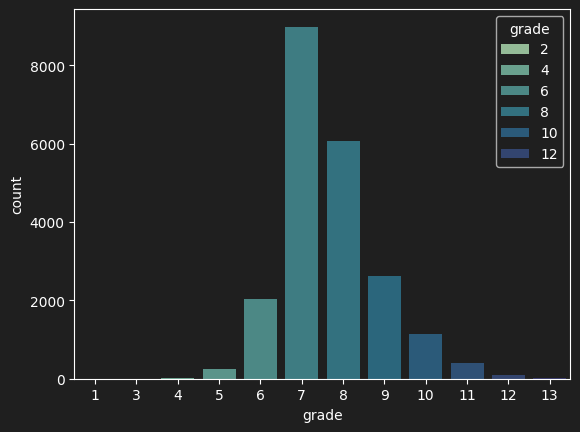

In [10]:
# Visualisation des variables ordinales
ordinal_cols=['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

for c in ordinal_cols:
    plt.figure()
    sns.countplot(data=df, x=df[c], palette='crest', hue=df[c])

<Axes: >

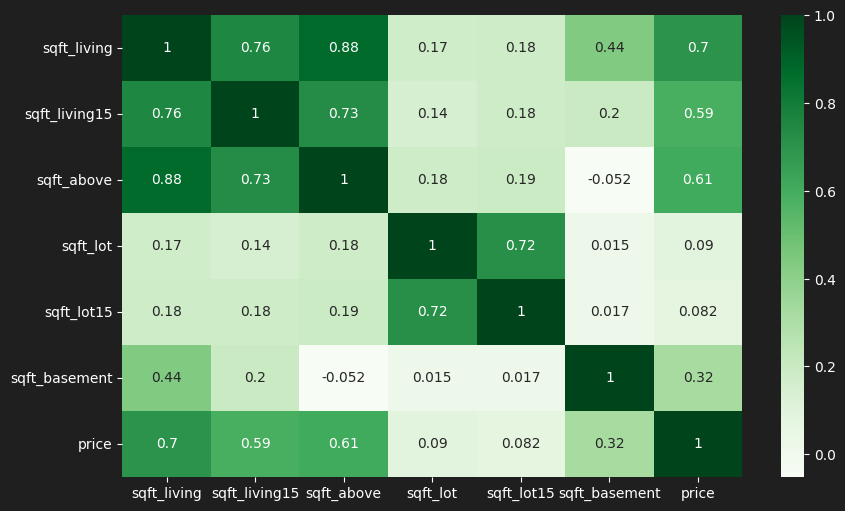

In [11]:
# Relations entre variables continues et price
columns.append('price')

plt.figure(figsize=(10, 6))
sns.heatmap(df[columns].corr(), annot=True, cmap='Greens')

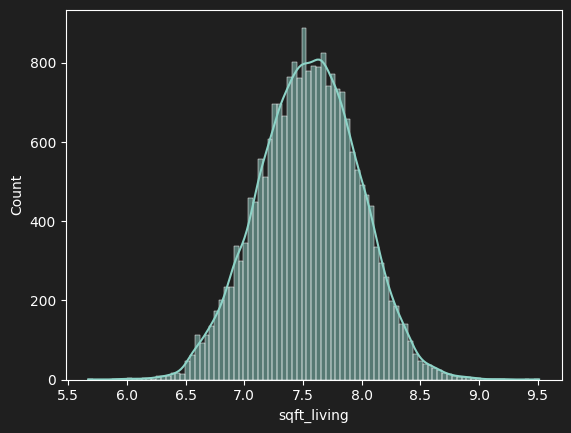

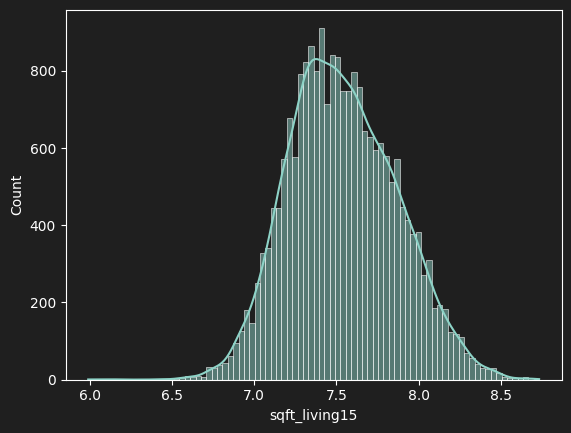

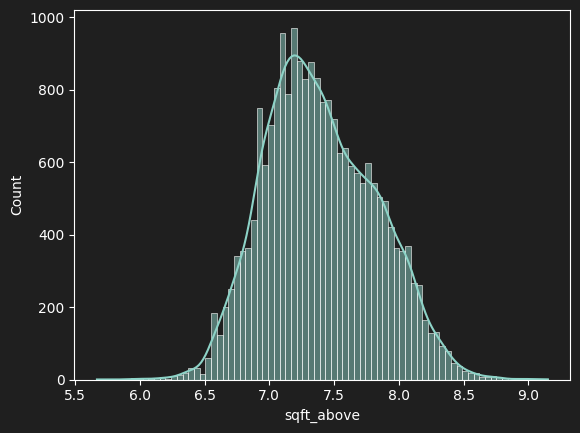

In [12]:
# visualisation du log des variables corrélées avec le prix
cols = ['sqft_living', 'sqft_living15', 'sqft_above']
for col in cols:
    log = np.log(df[col])
    plt.figure()
    sns.histplot(x=log, kde=True)

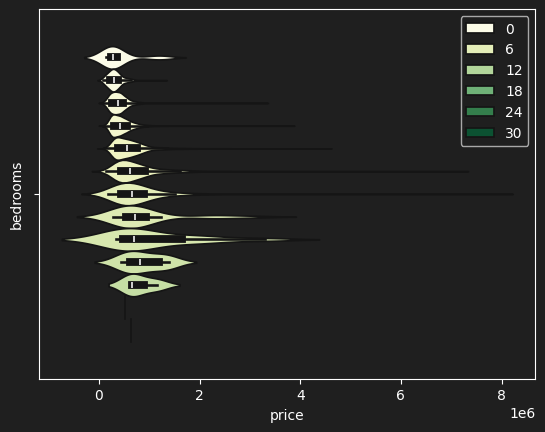

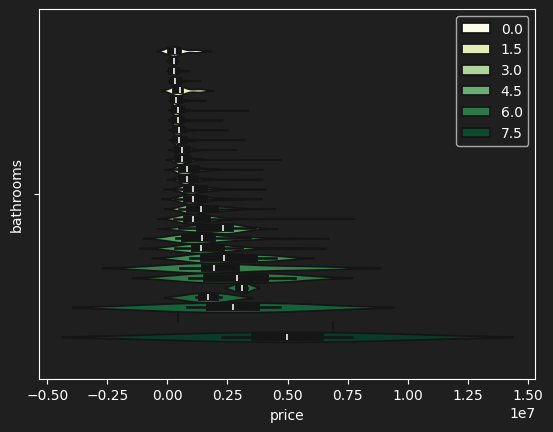

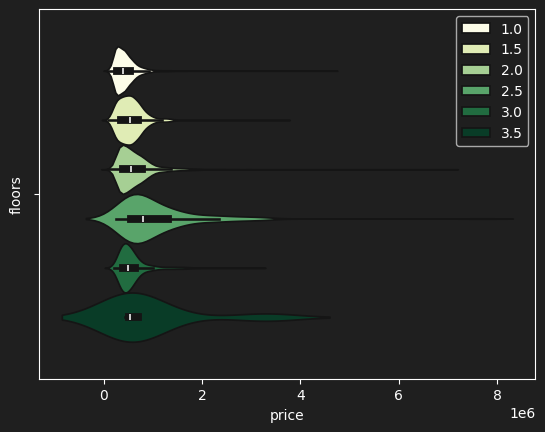

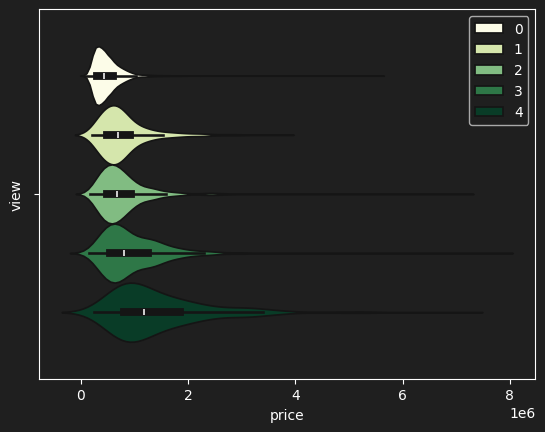

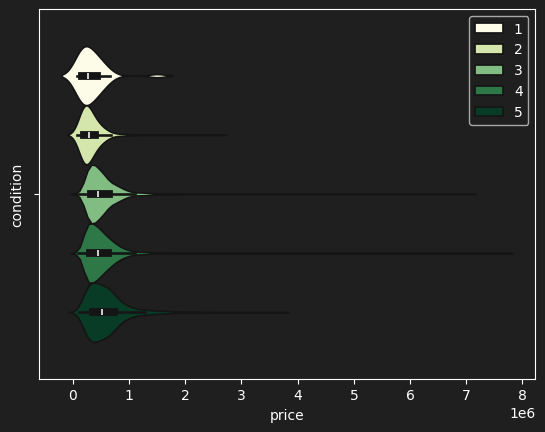

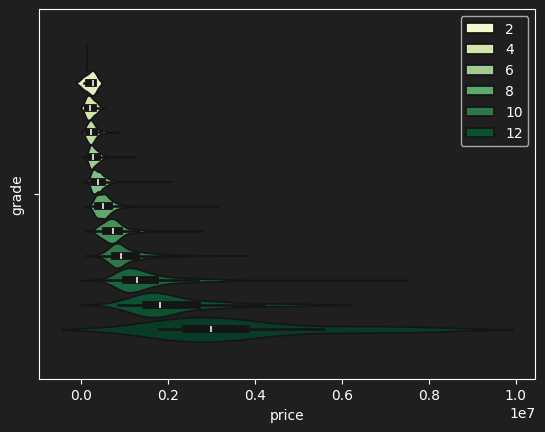

In [20]:
# Relations quali/target
for c in ordinal_cols:
    plt.figure()
    sns.violinplot(data=df, x=df['price'], hue=df[c], palette='YlGn')
    plt.ylabel(c)
    plt.legend()

<Axes: xlabel='zipcode', ylabel='price'>

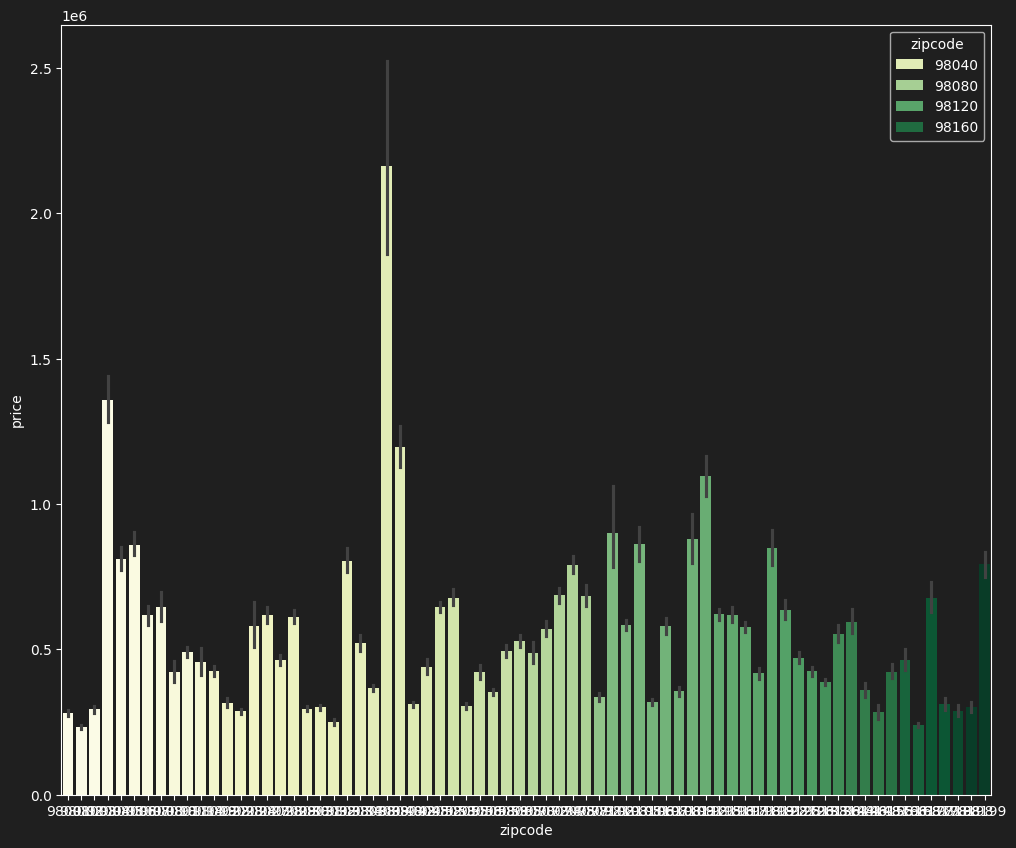

In [21]:
# Relation zipcode/price
plt.figure(figsize=(12, 10))
sns.barplot(data=df, x=df['zipcode'], y=df['price'], palette='YlGn', hue=df['zipcode'])

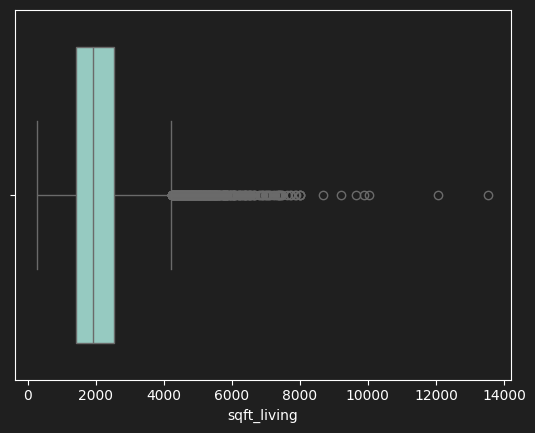

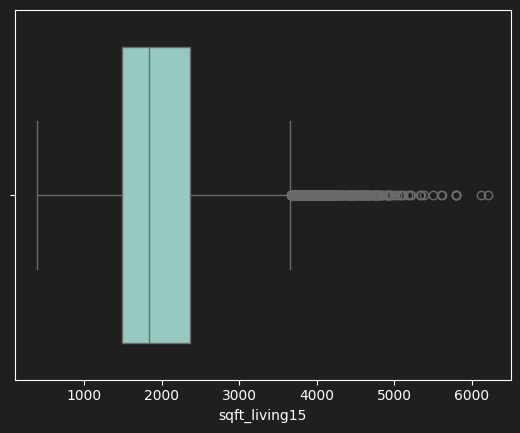

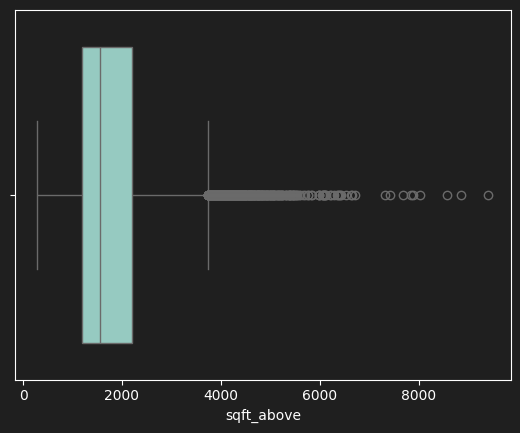

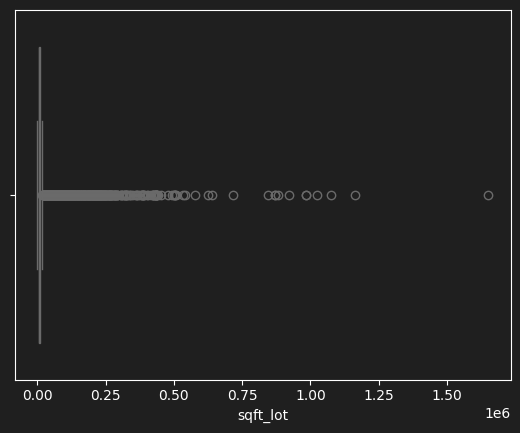

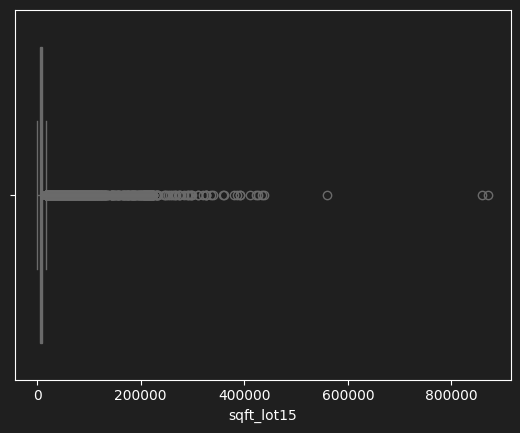

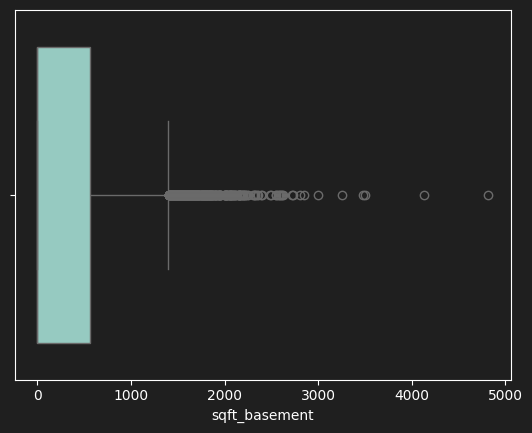

In [15]:
# outliers
columns = ['sqft_living', 'sqft_living15', 'sqft_above', 'sqft_lot', 'sqft_lot15', 'sqft_basement']
for col in columns:
    plt.figure()
    sns.boxplot(data=df, x=df[col])

### Test d'ANOVA

In [16]:
from scipy.stats import f_oneway

# definition du test
def anova_test(col):

    alpha = 0.02
    grouped = df.groupby(col)['price'].apply(list)

    f_stat, p_value = f_oneway(*grouped)

    if p_value < alpha:
        return(f'H0 rejetée (p_value = {p_value})')
    else:
        return('H0 non rejetée (p_value = {p_value})')

In [17]:
ordinal_cols = ['bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'grade']

In [18]:
# Application du test

for c in ordinal_cols:
    print(f'{c:-<10} {anova_test(c)}')

bedrooms-- H0 rejetée (p_value = 0.0)
bathrooms- H0 rejetée (p_value = 0.0)
floors---- H0 rejetée (p_value = 0.0)
view------ H0 rejetée (p_value = 0.0)
condition- H0 rejetée (p_value = 3.116011341857883e-31)
grade----- H0 rejetée (p_value = 0.0)
